In [1]:
# Using IRIS flower data set
# https://en.wikipedia.org/wiki/Iris_flower_data_set

# One VS ALL Classification Code
# For multiple class problems:

# We can use binary classification with Logistic Regression
# But we do it for all the classes


In [57]:
#Import libs
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [8]:
#Import Iris Dataset

iris=load_iris()

X=iris.data
Y=iris.target
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [9]:
#Create a df with the variables
#Check columns name top
DF = DataFrame(X, columns=["Sepal Length", "Sepal Width","Petal Length","Petal Width"])

#Create a DF for target
targetDF = DataFrame(Y,columns=["Species"])

In [15]:
#The species name are categorized as 0-1-2
#instead of Setosa, Versicolor,  Virginica

def RenameTarget(n):
    if n == 0:
        return "Setosa"
    elif n== 1:
        return "Versicolor"
    else:
        return "Virginica"

#Before Function
targetDF.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [16]:
targetDF["Species"] = targetDF["Species"].apply(RenameTarget)
#After Function
targetDF.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [18]:
DF= pd.concat([DF,targetDF],axis=1)
DF

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


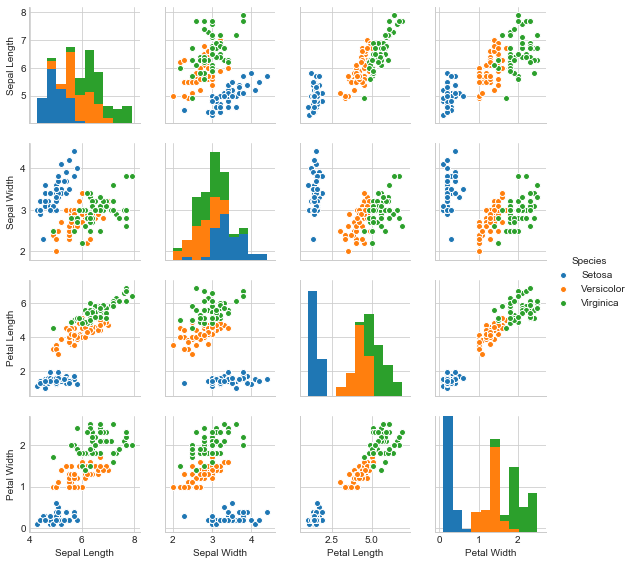

In [23]:
sns.pairplot(DF,hue="Species",size=2)

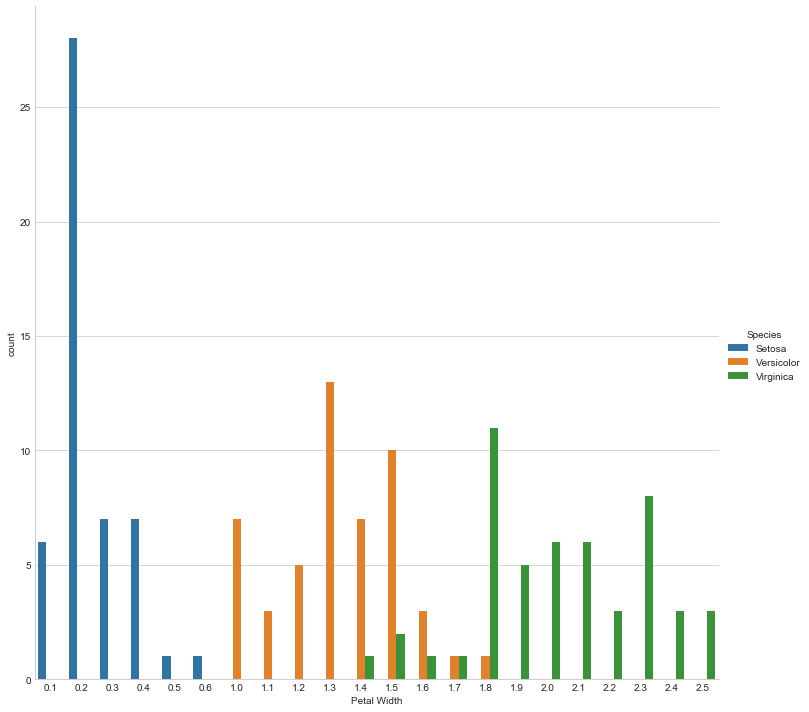

In [29]:
#Frequency according to the Petal Width
sns.factorplot("Petal Width",data=DF,hue="Species",kind="count", size=10)

In [53]:
# Let's create a Logistic Regression training and testing sets

LR = LogisticRegression()

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.35)

LR.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
#This is our prediction
#We can crosscheck it with Y_test

Y_prediction = LR.predict(X_test)
Y_prediction

array([2, 2, 2, 1, 2, 0, 2, 1, 1, 1, 2, 1, 0, 0, 0, 2, 1, 0, 1, 2, 2, 1, 0,
       1, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 0, 2, 1, 1, 2, 0, 2,
       0, 2, 1, 0, 2, 0, 0])

In [56]:
print(metrics.accuracy_score(Y_test,Y_prediction))
#Our accuracy is below
#Change test_size for different accuracy

0.924528301887


In [69]:
# K nearest neighbor algorithm 
k = KNeighborsClassifier(n_neighbors = 11)
k.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [70]:
Y_pred = k.predict(X_test)
print(metrics.accuracy_score(Y_test,Y_pred))

0.943396226415


In [75]:
# K neighbor gave us a better accuracy

# What if we used 1 as K

k = KNeighborsClassifier(n_neighbors = 1)
k.fit(X_train,Y_train)
Y_pred = k.predict(X_test)
print(metrics.accuracy_score(Y_test,Y_pred))



0.924528301887


In [87]:
#Different value for different ks lets iterate through ks to 
klist=range(1,21)

AccList = []

for kk in klist:
    k = KNeighborsClassifier(n_neighbors = kk)
    k.fit(X_train,Y_train)
    Y_pred = k.predict(X_test)
    AccList.append(metrics.accuracy_score(Y_test,Y_pred))
AccList

[0.92452830188679247,
 0.92452830188679247,
 0.94339622641509435,
 0.96226415094339623,
 0.94339622641509435,
 0.94339622641509435,
 0.94339622641509435,
 0.94339622641509435,
 0.94339622641509435,
 0.96226415094339623,
 0.94339622641509435,
 0.98113207547169812,
 0.94339622641509435,
 0.94339622641509435,
 0.94339622641509435,
 0.98113207547169812,
 0.96226415094339623,
 0.98113207547169812,
 0.96226415094339623,
 0.96226415094339623]

Text(0, 0.5, 'Accuracy')

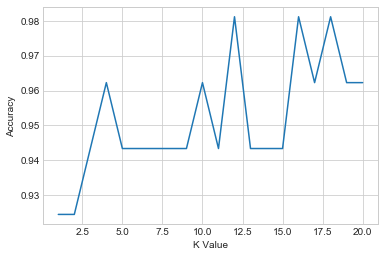

In [89]:
plt.plot(klist,AccList)
plt.xlabel("K Value")
plt.ylabel("Accuracy")
# Best k are shown below